# Spotify Most Streamed Songs

Data from:
https://www.kaggle.com/datasets/abdulszz/spotify-most-streamed-songs


## Imports and dataframe from file on drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [69]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Project_SpotifyMostStreamed/SpotifyMostStreamedSongs.csv")

## Brief look at the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Let's look at the all columns (split in two parts for better visibilty)

In [13]:
df.iloc[:, :11].head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133


In [14]:
df.iloc[:, 12:].head(5)

,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,10,826,125,B,Major,80,89,83,31,0,8,4,Not Found
1,14,382,92,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,14,949,138,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,12,548,170,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,15,425,144,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


Now I want to see how many missing values are there and in which columns

In [21]:
df[df.isna().any(axis=1)].iloc[:, :2]

,track_name,artist(s)_name
12,Flowers,Miley Cyrus
14,As It Was,Harry Styles
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish
22,I Wanna Be Yours,Arctic Monkeys
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,..."
...,...,...
901,After LIKE,IVE
903,B.O.T.A. (Baddest Of Them All) - Edit,"Interplanetary Criminal, Eliza Rose"
927,I Really Want to Stay at Your House,"Rosa Walton, Hallie Coggins"
938,Labyrinth,Taylor Swift


In [22]:
# checking which columns contain nans

df_contains_nan = [col_name for col_name in df.columns if df[col_name].isnull().any()]

print(f'Columns that contain NaN values: {df_contains_nan}')

Columns that contain NaN values: ['in_shazam_charts', 'key']


In [23]:
for col_name in df_contains_nan:
  nan_count = df[col_name].isnull().sum()
  print(f'Column {col_name} contains {nan_count} NaN values')

Column in_shazam_charts contains 50 NaN values
Column key contains 95 NaN values


I also want to see overlap between those (how many records have both missing)

In [37]:
missing_overlap_count = df[df_contains_nan].isnull().all(axis=1).sum()

print(f'Records that are missing values in both columns: {missing_overlap_count}')

# i'm also curious what those record are (and if I know those songs)
df[df[df_contains_nan].isnull().all(axis=1)].iloc[:, :2]

Records that are missing values in both columns: 9


,track_name,artist(s)_name
127,Watermelon Sugar,Harry Styles
395,Space Song,Beach House
504,Out of Time,The Weeknd
506,We Don't Talk About Bruno,"Adassa, Mauro Castillo, Stephanie Beatriz, Enc..."
531,Happier Than Ever,Billie Eilish
532,Moth To A Flame (with The Weeknd),"The Weeknd, Swedish House Mafia"
554,Peaches (feat. Daniel Caesar & Giveon),"Justin Bieber, Daniel Caesar, Giveon"
560,Life Goes On,Oliver Tree
727,Somebody That I Used To Know,"Gotye, Kimbra"


Now maybe key values destribution (I dont know much about technicalities of music, so I don't know how crucial that values would be for analysis)

['A', 'A#', 'B', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']


<Axes: >

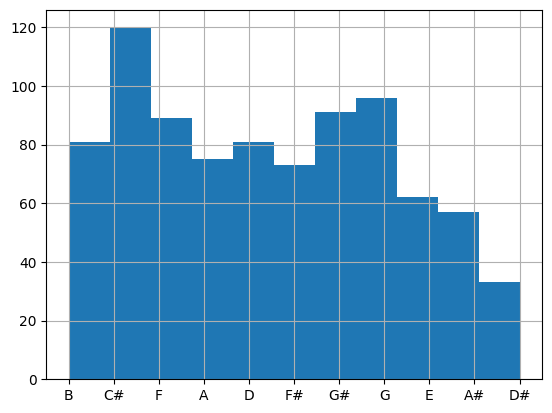

In [86]:
key_values = df['key'].unique()

# removing that pesky nan
key_values = sorted(key_values[key_values==key_values])
print(key_values)

bins = len(key_values)
df['key'].hist(bins=bins)

# do it in pyplot (those ticks annoy me)

To Do next:



*   See what kinds of values each columns has
*   ... and plot what I can
*   do some cleaning if necessary
* Maybe convers 'streams' from object to numerical type
* Transform released y/m/d -> date
* See how values in in_shazam_charts compare to values in other charts and then decide if I should drop it
* Maybe use algorithm to calculate in_shazam_charts based on other in_sth_charts values
* Probably keep key column for now since it's not numerical(but could be converted to num values)


Stay tuned for the next episode


